
Evaluating Multiple Models.
--- Random Forest ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--- SVM ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--- KNN ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1

C:\Users\mehra\AppData\Local\Temp\ipykernel_16800\2781625377.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


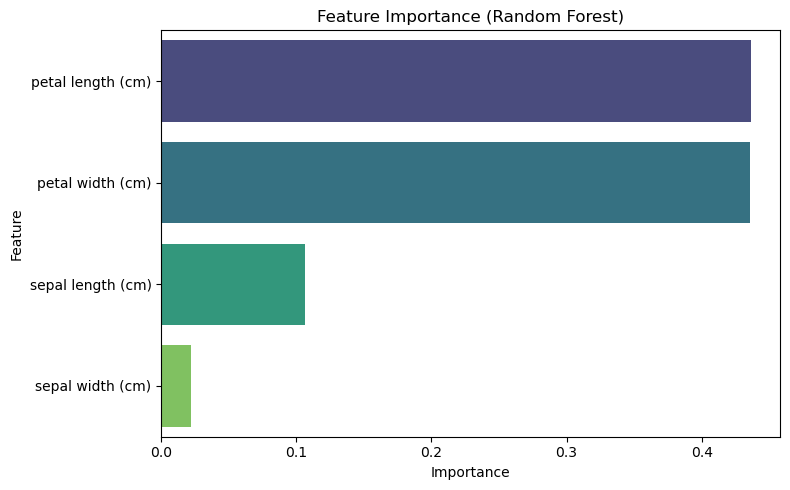


Comparing Model Accuracies.


C:\Users\mehra\AppData\Local\Temp\ipykernel_16800\2781625377.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=names, y=values, palette="Set2")


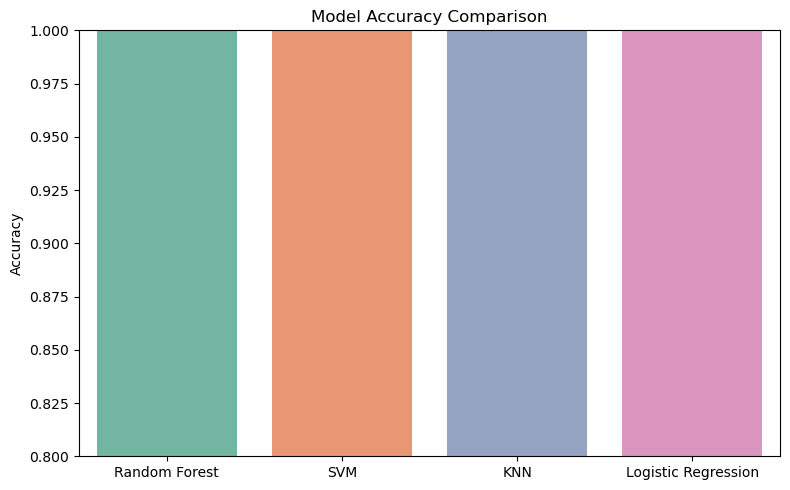

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
def load_data():
    iris = load_iris()
    X = pd.DataFrame(iris.data, columns=iris.feature_names)
    y = pd.Series(iris.target, name='species')
    return X, y, iris.target_names

# Train and evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "SVM": SVC(kernel='linear'),
        "KNN": KNeighborsClassifier(),
        "Logistic Regression": LogisticRegression(max_iter=200)
    }
    scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        scores[name] = acc
        print(f"--- {name} ---")
        print("Accuracy:", acc)
        print(classification_report(y_test, y_pred))

    return scores

# Get the best model
def best_model_name(scores):
    return max(scores, key=scores.get)

# Visualization of Random Forest feature importance
def plot_feature_importance(X, y):
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)
    importances = rf.feature_importances_
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
    plt.title('Feature Importance (Random Forest)')
    plt.tight_layout()
    plt.show()

# Accuracy comparison bar chart
def plot_accuracy_comparison(scores):
    names = list(scores.keys())
    values = list(scores.values())
    plt.figure(figsize=(8, 5))
    sns.barplot(x=names, y=values, palette="Set2")
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0.8, 1.0)
    plt.tight_layout()
    plt.show()

# Main program
def main():
    X, y, class_names = load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\nEvaluating Multiple Models.")
    scores = evaluate_models(X_train, X_test, y_train, y_test)

    print("\nBest Model:", best_model_name(scores))

    print("\nVisualizing Feature Importance (Random Forest).")
    plot_feature_importance(X, y)

    print("\nComparing Model Accuracies.")
    plot_accuracy_comparison(scores)

if __name__ == "__main__":
    main()